### Simulating From the Null Hypothesis

Load in the data below, and follow the questions to assist with answering the quiz questions below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
np.random.seed(42)
sns.set()

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)
sample_data.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


In [16]:
cof = sample_data[sample_data['drinks_coffee'] == True]['height'].mean()
no_cof = sample_data[sample_data['drinks_coffee'] == False]['height'].mean()

obs_diff = cof - no_cof

print(' The Average Height of Coffee Drinkers: {:.4f}\n The Average Height of Non Coffee Drinkers: {:.4f}\n\
 The Difference of Heights: {:.4f}'.format(cof, no_cof, obs_diff))

 The Average Height of Coffee Drinkers: 68.1196
 The Average Height of Non Coffee Drinkers: 66.7849
 The Difference of Heights: 1.3347


`1.` If you were interested in if the average height for coffee drinkers is the same as for non-coffee drinkers, what would the null and alternative be?  Place them in the cell below, and use your answer to answer the first quiz question below.

**Since there is no directional component associated with this statement, a not equal to seems most reasonable.**

$$H_0: \mu_{coff} - \mu_{no} = 0$$


$$H_0: \mu_{coff} - \mu_{no} \neq 0$$


**$\mu_{coff}$ and $\mu_{no}$ are the population mean values for coffee drinkers and non-coffee drinkers, respectivley.**

`2.` If you were interested in if the average height for coffee drinkers is less than non-coffee drinkers, what would the null and alternative be?  Place them in the cell below, and use your answer to answer the second quiz question below.

**In this case, there is a question associated with a direction - that is the average height for coffee drinkers is less than non-coffee drinkers.  Below is one of the ways you could write the null and alternative.  Since the mean for coffee drinkers is listed first here, the alternative would suggest that this is negative.**

$$H_0: \mu_{coff} - \mu_{no} \geq 0$$


$$H_0: \mu_{coff} - \mu_{no} < 0$$


**$\mu_{coff}$ and $\mu_{no}$ are the population mean values for coffee drinkers and non-coffee drinkers, respectivley.**

`3.` For 10,000 iterations: bootstrap the sample data, calculate the mean height for coffee drinkers and non-coffee drinkers, and calculate the difference in means for each sample.  You will want to have three arrays at the end of the iterations - one for each mean and one for the difference in means.  Use the results of your sampling distribution, to answer the third quiz question below.

In [2]:
coff, no_coff, diff = [], [], []
for i in range(10000):
    sample = sample_data.sample(200, replace=True)
    coff_h = sample[sample['drinks_coffee'] == True]['height'].mean()
    no_coff_h = sample[sample['drinks_coffee'] == False]['height'].mean()
    
    coff.append(coff_h)
    no_coff.append(no_coff_h)
    diff.append(coff_h - no_coff_h)


In [15]:
print(' The Std of heights of Coffee Drinkers: {:.4f} \n The Std of heights of Non Coffee Drinkers: {:.4f}\
\n The Std of heights of Differences: {:.4f}'.format(np.std(coff), np.std(no_coff), np.std(diff)))

 The Std of heights of Coffee Drinkers: 0.2407 
 The Std of heights of Non Coffee Drinkers: 0.4051
 The Std of heights of Differences: 0.4698


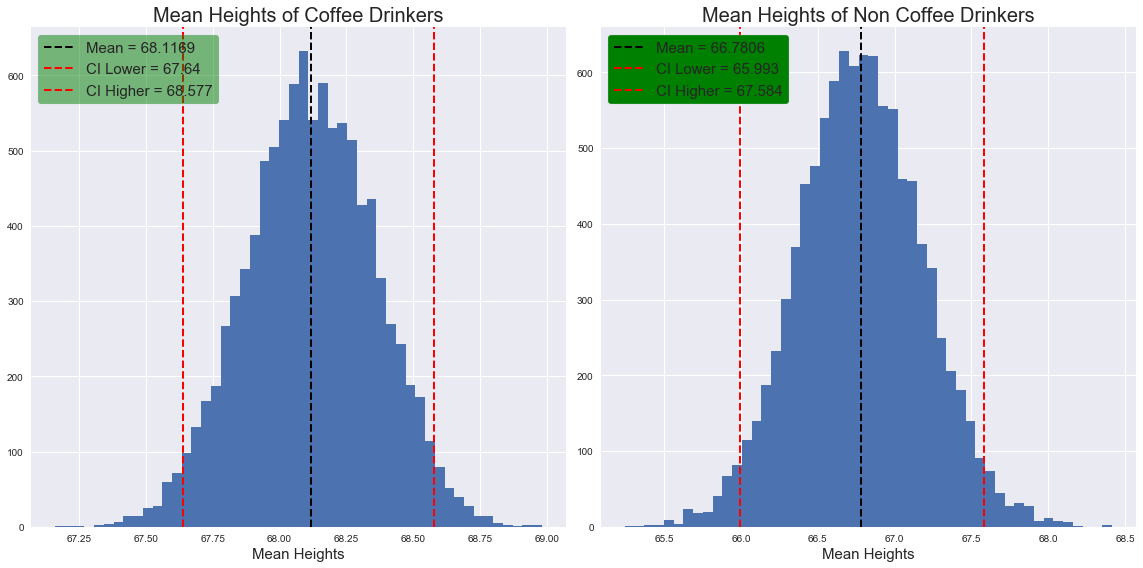

In [45]:
plt.subplots(1,2, figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.hist(coff, bins=50)
plt.xlabel('Mean Heights', fontsize=15)
plt.title('Mean Heights of Coffee Drinkers', fontsize=20)
plt.axvline(np.mean(coff), linestyle='--', linewidth=2, label='Mean = {}'.format(np.mean(coff).round(4)), color='k')
ci = np.percentile(coff, [2.5, 97.5])
plt.axvline(ci[0], linestyle='--', linewidth=2, label='CI Lower = {}'.format(ci[0].round(3)), color='r')
plt.axvline(ci[1], linestyle='--', linewidth=2, label='CI Higher = {}'.format(ci[1].round(3)), color='r')
plt.legend(loc='upper left', frameon=True, fontsize=15, facecolor='g', framealpha=0.5)

plt.subplot(1, 2, 2)
plt.hist(no_coff, bins=50)
plt.xlabel('Mean Heights', fontsize=15)
plt.title('Mean Heights of Non Coffee Drinkers', fontsize=20)
plt.axvline(np.mean(no_coff), linestyle='--', linewidth=2, label='Mean = {}'.format(np.mean(no_coff).round(4)), color='k')
ci = np.percentile(no_coff, [2.5, 97.5])
plt.axvline(ci[0], linestyle='--', linewidth=2, label='CI Lower = {}'.format(ci[0].round(3)), color='r')
plt.axvline(ci[1], linestyle='--', linewidth=2, label='CI Higher = {}'.format(ci[1].round(3)), color='r')
plt.legend(loc='upper left', frameon=True, fontsize=15, facecolor='g', framealpha=1)
plt.tight_layout()

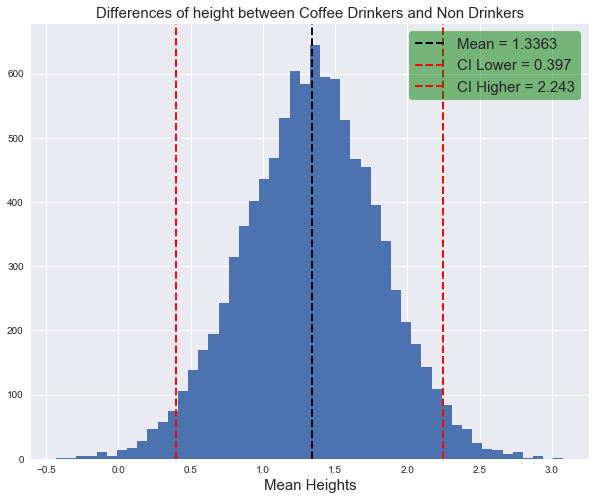

In [49]:
plt.figure(figsize=(10, 8))
plt.hist(diff, bins=)
plt.xlabel('Mean Heights', fontsize=15)
plt.title('Differences of height between Coffee Drinkers and Non Drinkers', fontsize=15)
plt.axvline(np.mean(diff), linestyle='--', linewidth=2, label='Mean = {}'.format(np.mean(diff).round(4)), color='k')
ci = np.percentile(diff, [2.5, 97.5])
plt.axvline(ci[0], linestyle='--', linewidth=2, label='CI Lower = {}'.format(ci[0].round(3)), color='r')
plt.axvline(ci[1], linestyle='--', linewidth=2, label='CI Higher = {}'.format(ci[1].round(3)), color='r')
plt.legend(loc='upper right', frameon=True, fontsize=15, facecolor='g', framealpha=0.5);

`4.` Now, use your sampling distribution for the difference in means and [the docs](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) to simulate what you would expect if your sampling distribution were centered on zero.  Also, calculate the observed sample mean difference in `sample_data`. Use your solutions to answer the last questions in the quiz below.

** We would expect the sampling distribution to be normal by the Central Limit Theorem, and we know the standard deviation of the sampling distribution of the difference in means from the previous question, so we can use this to simulate draws from the sampling distribution under the null hypothesis.  If there is truly no difference, then the difference between the means should be zero.**

In [17]:
#Stimulating Null Values
null_vals = np.random.normal(0, np.std(diff), size=len(diff))

#P-value
p = (null_vals > obs_diff).mean()

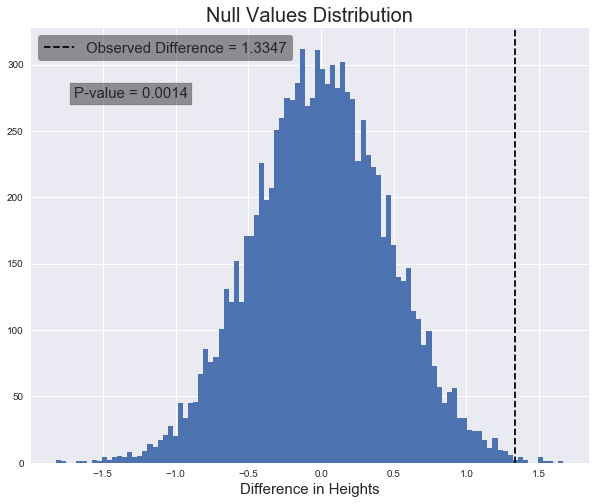

In [52]:
plt.figure(figsize=(10, 8))
plt.hist(null_vals, bins=int(np.sqrt(len(diff)))) 
plt.xlabel('Difference in Heights', fontsize=15)
plt.title('Null Values Distribution', fontsize=20)
plt.axvline(obs_diff, linestyle='--', color='k', label='Observed Difference = {:.4f}'.format(obs_diff))
plt.legend(frameon=True, fontsize=15, facecolor='k', framealpha=0.4)
plt.text(s='P-value = {:.4f}'.format(p), x=-1.7, y=275, fontsize=15, bbox = dict(color='k', alpha=0.4));

C:\Users\stali\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([1.40474072, 1.42748287, 1.28613369, ..., 0.86936826, 0.78077083,
       1.34030074])